# **Imports**

In [1]:
# data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# machine learning models/ processing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture

# dealing with imbalanced class distributions
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

In [2]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)

# **A. Data Exploration and Baseline Mode**

## 1. Load and Analyze the Dataset

In [3]:
# uncomment if you want to mount google drive in google colab
# from google.colab import drive
# drive.mount('/content/drive')
# PATH = "/content/drive/MyDrive/datasets/creditcard.csv"

In [4]:
%%time
PATH = "creditcard.csv"
df = pd.read_csv(PATH) # make sure to include correct path to CSV file
print(f"Size of dataset: {df.shape}, with {df.shape[0]} data-points and {df.shape[1]} columns/features\n")
df.head()

Size of dataset: (284807, 31), with 284807 data-points and 31 columns/features

CPU times: total: 1.83 s
Wall time: 1.9 s


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
if df.isna().sum().sum():
    print(df.isna().sum())
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# adding column for human understanding
df['transaction_type'] = df['Class'].apply(lambda x: "Fraud" if x == 1 else "Not Fraud")

## 2. Analyze Class Distribution

In [9]:
print(f"Out of {df.shape[0]} data points,\n")
for k, v in df['transaction_type'].value_counts().to_dict().items():
    print(f"{k}: {v} => {round((v/df.shape[0])*100, 2)} % {k} transactions")
lookup = df['transaction_type'].value_counts().to_dict()
ratio = int(lookup['Not Fraud']/lookup['Fraud'])
print(f"\nThus, for every 1 Fraud transactions, there are about {ratio} Not Fraud transactions\n\nImplying a heavy class imbalance!!")

Out of 284807 data points,

Not Fraud: 284315 => 99.83 % Not Fraud transactions
Fraud: 492 => 0.17 % Fraud transactions

Thus, for every 1 Fraud transactions, there are about 577 Not Fraud transactions

Implying a heavy class imbalance!!


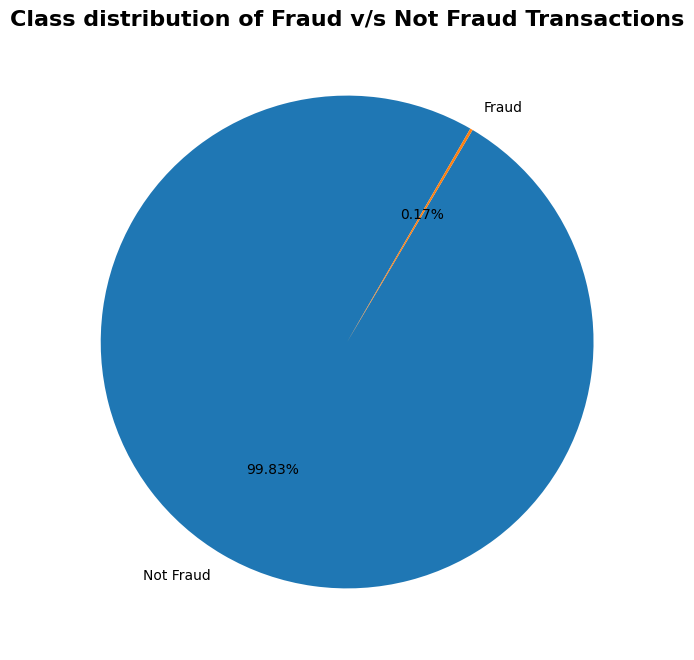

In [10]:
df['transaction_type'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    startangle=60,
    figsize=(8,8)
)
plt.ylabel('')
plt.title("Class distribution of Fraud v/s Not Fraud Transactions", fontsize=16, fontweight='bold')
plt.show()

## 3. Baseline Model

The dataset is to be standardized before training. Logistic Regression is sensitive to feature scales, and standardization ensures that features contribute proportionately, leading to better convergence and more reliable performance evaluation.

In [11]:
scaler1 = StandardScaler()

In [12]:
X = df.drop(columns=['Class', 'transaction_type'])
y = df['Class']
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [13]:
print(f"Training set size: {X_train.shape[0]}\nTesting set size: {X_test.shape[0]}")

Training set size: 242085
Testing set size: 42722


In [17]:
X_train_scaled = scaler1.fit_transform(X_train)
X_test_scaled = scaler1.transform(X_test)

In [140]:
def evaluate_model(y_true, y_pred, model_name="Model", verbose=True):
    cm = confusion_matrix(y_true, y_pred)
    if verbose:
        plt.figure(figsize=(6,5))
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)']
        )
        plt.xlabel('Predicted Label', fontsize=12)
        plt.ylabel('True Label', fontsize=12)
        plt.title(f'Confusion Matrix - {model_name}', fontsize=16, fontweight='bold')
        plt.show()
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "Confusion matrix": cm,
        "Model Name":model_name,
    }
    if verbose:
        print(f"{model_name} performance metrics")
        for name, value in metrics.items():
            try:
                print(f"{name:<10} = {value:.3f}")
            except:
                print(f"{name:<10} (x axis = predicted, y axis = true) = \n{value}")
    return metrics

def model_preds(X_train, y_train, X_test, y_test, model_class, model_params):
    model = model_class(**model_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

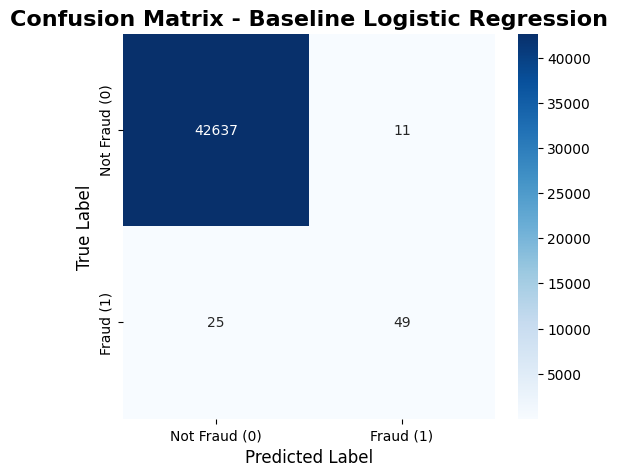

Baseline Logistic Regression performance metrics
Accuracy   = 0.999
Precision  = 0.817
Recall     = 0.662
F1 Score   = 0.731
Confusion matrix (x axis = predicted, y axis = true) = 
[[42637    11]
 [   25    49]]
Model Name (x axis = predicted, y axis = true) = 
Baseline Logistic Regression


In [141]:
params1 = {}
y_pred1 = model_preds(X_train_scaled, y_train, X_test_scaled, y_test, LogisticRegression, params1)
model1_metrics = evaluate_model(y_test, y_pred1, model_name="Baseline Logistic Regression")

Based on the confusion matrix and performance metrics for **Baseline logistic regression**, we observe that although the model achieves high overall `accuracy`, the key metrics for the minority class (fraud cases) - `precision`, `recall`, and `f1-score` - reveal important limitations.

For example:  
+ A `recall` of **0.662** indicates that the model correctly identifies only about 6 out of every 10 actual fraud cases, while missing the remaining ones.  
+ A `precision` of **0.817** means that when the model predicts a transaction as fraud, roughly 8 out of 10 predictions are correct, while 2 are false alarms.  
+ The `f1-score`, which balances both precision and recall, provides a more reliable single measure of performance in imbalanced classification scenarios such as fraud detection.

Hence in this imbalanced scenario, `accuracy` is misleading because the dataset is dominated by non-fraudulent cases, so a model can achieve high accuracy by mostly predicting the majority class, while still failing to detect a significant portion of fraud cases.

Let us try to incorporate class weights...

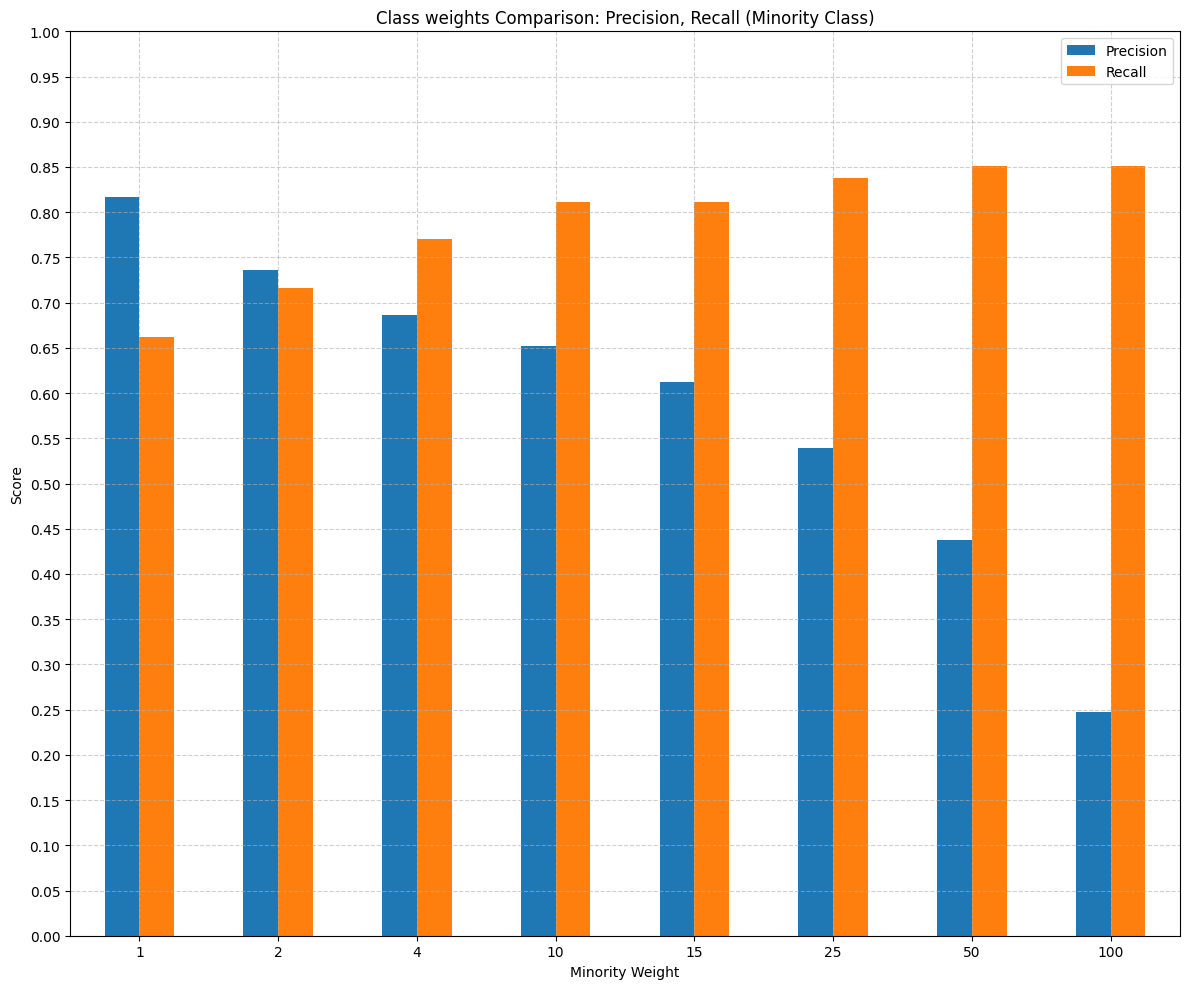

In [142]:
class_weights = [1, 2, 4, 10, 15, 25, 50, 100]
params = {"penalty":'l2', "solver":'lbfgs', "random_state":42,}
pre, rec = [], []
for c1w in class_weights:
    params["class_weight"] = {0:1, 1:c1w}
    y_pred = model_preds(X_train_scaled, y_train, X_test_scaled, y_test, LogisticRegression, params)
    metrics = evaluate_model(y_test, y_pred, verbose=False)
    pr, re = metrics['Precision'], metrics['Recall']
    pre.append(pr)
    rec.append(re)
    params.pop("class_weight")
metric_df = pd.DataFrame({"Precision":pre, "Recall":rec, "Minority Weight":class_weights}).set_index('Minority Weight')
metric_df.plot(kind='bar', figsize=(12, 10))
plt.title('Class weights Comparison: Precision, Recall (Minority Class)')
plt.ylabel('Score')
plt.yticks(np.linspace(0, 1, 21))
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(alpha=0.6, linestyle='--')
plt.show()

`2` seems giving good balance.

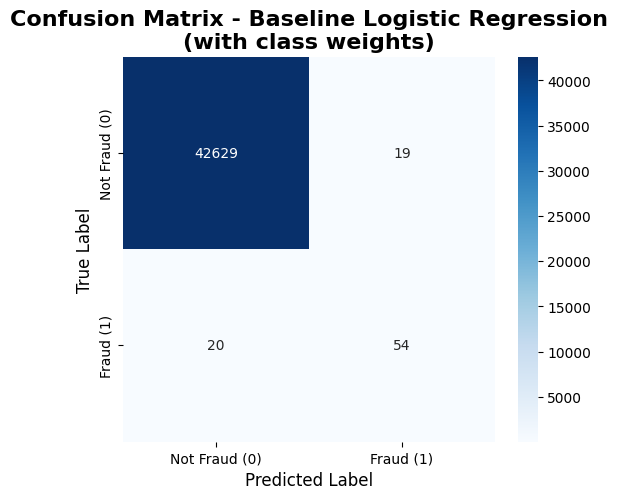

Baseline Logistic Regression
(with class weights) performance metrics
Accuracy   = 0.999
Precision  = 0.740
Recall     = 0.730
F1 Score   = 0.735
Confusion matrix (x axis = predicted, y axis = true) = 
[[42629    19]
 [   20    54]]
Model Name (x axis = predicted, y axis = true) = 
Baseline Logistic Regression
(with class weights)


In [143]:
class_weight = {0: 1, 1: 2}
params2 = {"penalty":'l2', "solver":'liblinear', "random_state":42, "class_weight":class_weight}
y_pred2 = model_preds(X_train_scaled, y_train, X_test_scaled, y_test, LogisticRegression, params2)
model2_metrics = evaluate_model(y_test, y_pred2, model_name="Baseline Logistic Regression\n(with class weights)")

# **B. Resampling Approaches**

## 1. Naive Oversampling (SMOTE)

In [32]:
smote = SMOTE(k_neighbors=2, random_state=16)

In [33]:
print("Original dataset shape:", collections.Counter(y_train))
# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
# After SMOTE
print("Resampled dataset shape:", collections.Counter(y_train_smote))

Original dataset shape: Counter({0: 241667, 1: 418})
Resampled dataset shape: Counter({0: 241667, 1: 241667})


### Working of SMOTE Algorithm

The **Synthetic Minority Over-sampling Technique (SMOTE)** generates synthetic data points for the minority class to address class imbalance.  

The procedure works as follows:

1. For each minority class point $x_i$, identify its $k$ nearest neighbors in the feature space. Let this set be $S$.  

2. Randomly select one neighbor $x_k$ $\in$ $S$.  

3. Generate a new synthetic point $x_{new}$ along the line joining $x_i$ and $x_k$:  

   $$x_{new} = x_i + \lambda (x_k - x_i)$$


   where $\lambda$ $\sim$ $U(0,1)$ is a random number in the interval $[0,1]$.  
   This ensures the synthetic point lies between the two original samples.

By repeating this process for multiple points, SMOTE creates synthetic samples that increase the representation of the minority class, leading to a more balanced dataset.


### Limitations of SMOTE Algorithm

+ A very large value of `k_neighbors` can sometimes generate quite noisy samples, since far-away neighbors may belong to a different representative group (subcluster) within the minority class, leading to synthetic points in ambiguous or overlapping regions with the majority class.

+ If the minority class is not well-separated from the majority class, SMOTE may generate synthetic points in overlapping areas, introducing noise.

+ Models may overfit to synthetic samples that do not accurately represent real-world data distributions, leading to poor generalization.

+ In very high-dimensional spaces, the concept of "nearest neighbors" becomes less meaningful (distances between points tend to converge), which can reduce the quality of the generated synthetic samples.

## 2. Clustering-Based Oversampling (CBO)

### Using Oversampling of Minority Class from Clusters of Minority Classes

Clustering-Based Oversampling (CBO) improves diversity among synthetic samples by first clustering the minority class into sub-groups (using K-Means or similar) and then oversampling within each cluster.

+ This ensures that all sub-groups are represented fairly.

+ It prevents generating synthetic points in regions where no real data exists.

In [34]:
# let us first separate out the minority class from our entire train set
mask1 = list(y_train == 1)
mask2 = list(y_train == 0)
X_minority = X_train_scaled[mask1, :]
X_majority = X_train_scaled[mask2, :]
print(f"X_majority.shape: {X_majority.shape}")
print(f"X_minority.shape: {X_minority.shape}")

X_majority.shape: (241667, 30)
X_minority.shape: (418, 30)


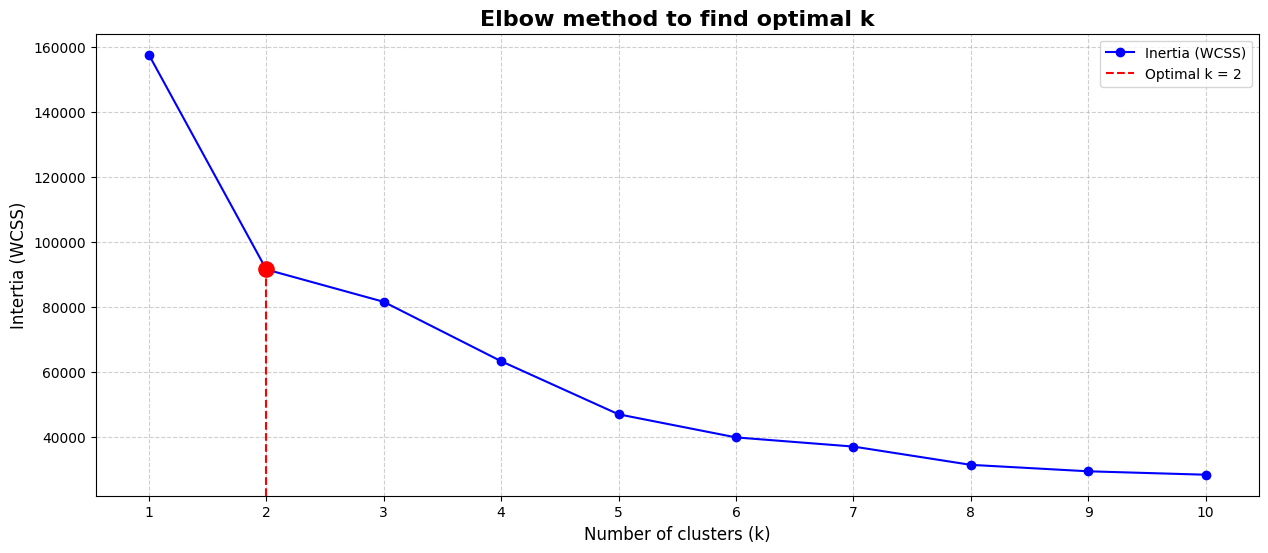

In [35]:
# let us find optimal k via elbow method
inertias = []
k_range = list(range(1, 11)) # let us choose number of clusters between [1, 10]
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_minority)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(15, 6))
plt.plot(k_range, inertias, color='blue', marker='o', linestyle='-', label="Inertia (WCSS)")
optimal_k = 2
plt.axvline(x=optimal_k, ymax=0.5, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.scatter(optimal_k, inertias[optimal_k-1], color='red', s=120, zorder=5)
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Intertia (WCSS)", fontsize=12)
plt.xticks(k_range)
plt.title("Elbow method to find optimal k", fontsize=16, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

`k=2` or `k=3` might be a good choice, since after that there is only gradual decrease in WCSS scores. Let us check via $\Delta$WCSS and silhoutte scores.

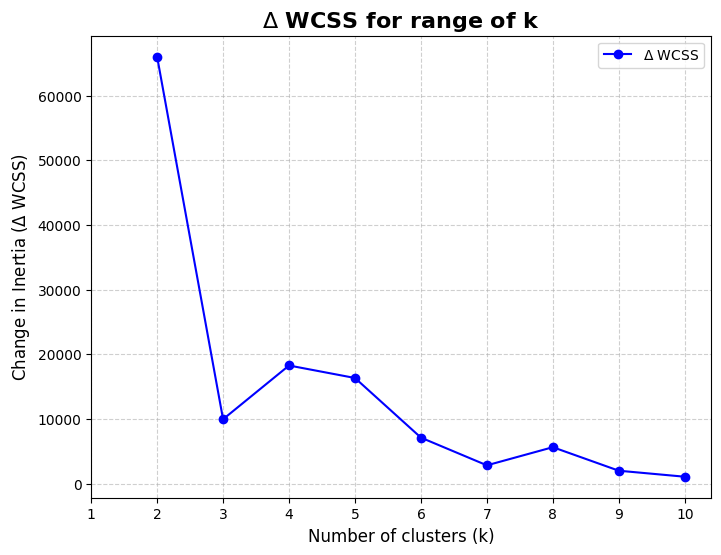

In [38]:
deltas = [inertias[i-1]-inertias[i] for i in range(1, len(inertias))]
plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], deltas, "bo-", label=f"$\\Delta$ WCSS")
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Change in Inertia ($\\Delta$ WCSS)", fontsize=12)
plt.xticks(k_range)
plt.title("$\\Delta$ WCSS for range of k", fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

`k=2` shows the highest change in **WCSS**.

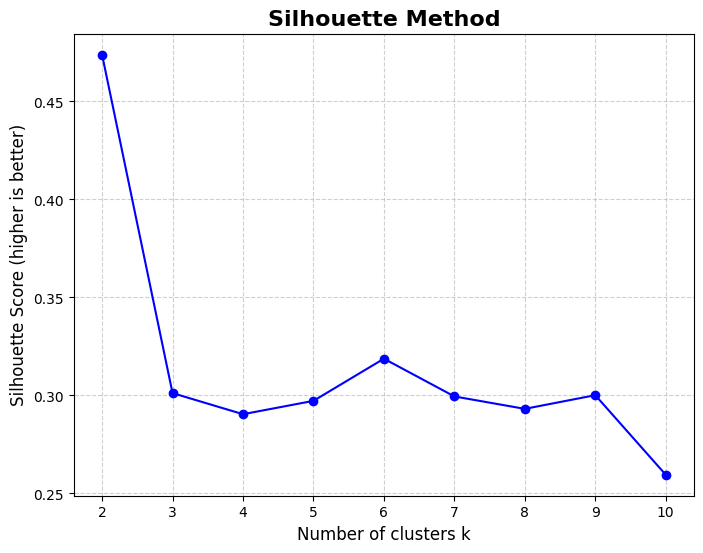

In [39]:
silhouette_scores = []
k_range = range(2, 11) # let us search in a shorter search space
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_minority)
    score = silhouette_score(X_minority, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters k', fontsize=12)
plt.ylabel('Silhouette Score (higher is better)', fontsize=12)
plt.title('Silhouette Method', fontsize=16, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

We can thus conclude with our claim of `k=2` from both $\Delta$WCSS and silhoutte score method.

In [40]:
def clustering_based_oversampling(X, y, minority_class=1, k=2, random_state=16):
    """
    Perform Clustering-Based Oversampling (CBO) on the minority class.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix (e.g., scaled training data).
    y : array-like, shape (n_samples,)
        Target labels.
    minority_class : int or str, default=1
        Label of the minority class.
    k : int, default=2
        Number of clusters for minority class (from Elbow Method).
    random_state : int, default=16
        Random seed for reproducibility.

    Returns
    -------
    X_balanced : ndarray
        Balanced feature matrix after CBO.
    y_balanced : ndarray
        Balanced labels after CBO.
    """

    # separate majority and minority
    X_min = X[y == minority_class, :]
    X_maj = X[y != minority_class, :]
    y_min = y[y == minority_class]
    y_maj = y[y != minority_class]

    # cluster minority class only
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    clusters = kmeans.fit_predict(X_min)

    # oversample within each cluster
    target_size = len(y_maj)                # match majority size
    samples_per_cluster = target_size // k  # divide across clusters

    X_min_oversampled, y_min_oversampled = [], []

    for cluster_id in range(k):
        X_cluster = X_min[clusters == cluster_id]
        y_cluster = y_min[clusters == cluster_id]

        # oversample among each minority cluster
        X_res, y_res = resample(
            X_cluster, y_cluster,
            replace=True,
            n_samples=samples_per_cluster,
            random_state=random_state
        )
        X_min_oversampled.append(X_res)
        y_min_oversampled.append(y_res)

    X_min_bal = np.vstack(X_min_oversampled)
    y_min_bal = np.hstack(y_min_oversampled)

    # combine back
    X_balanced = np.vstack([X_maj, X_min_bal])
    y_balanced = np.hstack([y_maj, y_min_bal])

    return X_balanced, y_balanced

In [41]:
X_train_cbo, y_train_cbo = clustering_based_oversampling(
    X_train_scaled, y_train, 
    minority_class=1, 
    k=2, 
    random_state=16
)
print("Original dataset shape:", collections.Counter(y_train))
print("Resampled dataset shape:", collections.Counter(y_train_cbo.tolist()))

Original dataset shape: Counter({0: 241667, 1: 418})
Resampled dataset shape: Counter({0: 241667, 1: 241666})


## 3. Clustering-Based Undersampling (CBU)

+ Instead of randomly throwing away majority samples, Clustering-Based Undersampling groups the majority class into clusters (using K-Means or similar). Then, it replaces the cluster with its centroid or representative samples.

+ This ensures the reduced dataset preserves diversity of the original majority distribution while cutting down size. It avoids bias from removing too many points from dense regions.

Process:

1. Cluster the majority class only.

2. Select samples from clusters (e.g., cluster centroids) so that the new majority set is smaller but still representative.

3. Combine with all minority class samples to form a balanced dataset.

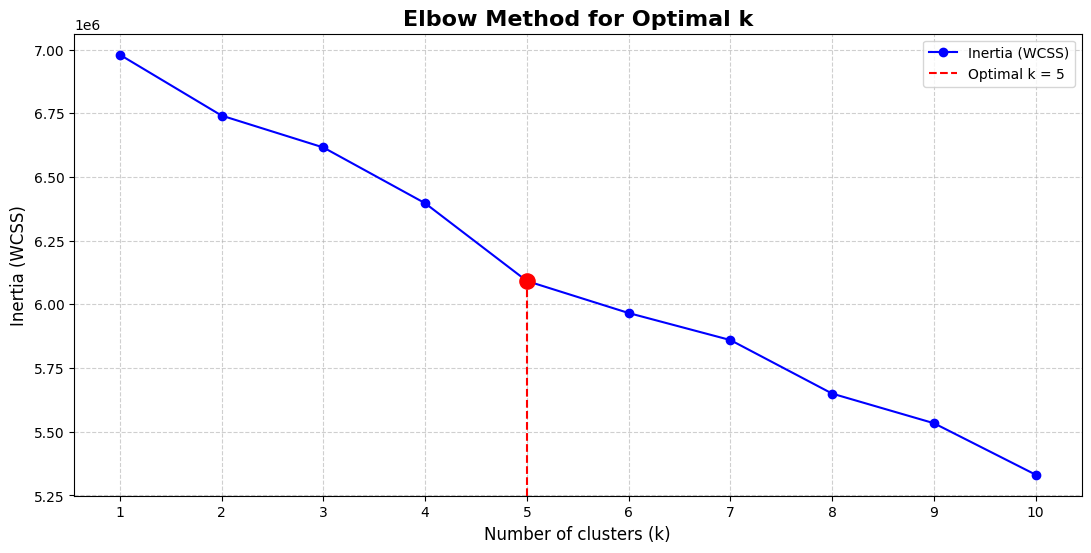

In [42]:
# let us find optimal k via elbow method for majority class
inertias = []
k_range = list(range(1, 11))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_majority)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(13, 6))
plt.plot(k_range, inertias, color='blue', marker='o', linestyle='-', label="Inertia (WCSS)")

optimal_k = 5
plt.axvline(x=optimal_k, ymax=0.45, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.scatter(optimal_k, inertias[optimal_k-1], color='red', s=120, zorder=5)

plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Inertia (WCSS)", fontsize=12)
plt.xticks(k_range)
plt.title("Elbow Method for Optimal k", fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

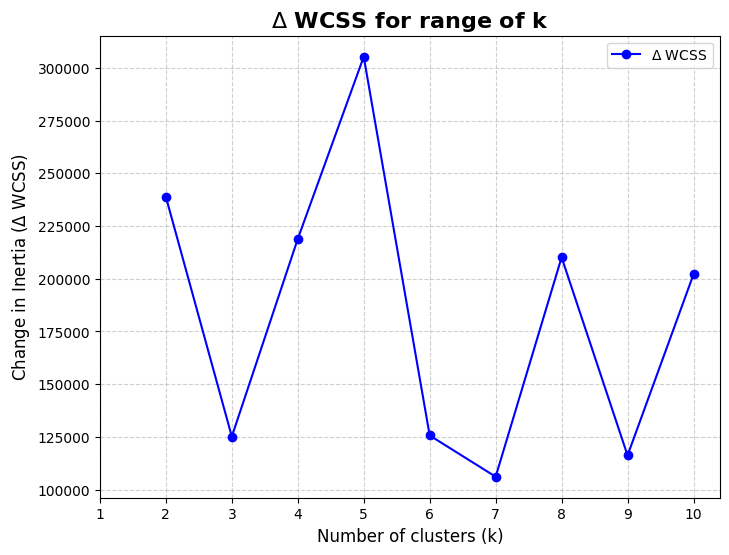

In [44]:
deltas = [inertias[i-1]-inertias[i] for i in range(1, len(inertias))]
plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], deltas, "bo-", label=f"$\\Delta$ WCSS")
plt.xlabel("Number of clusters (k)", fontsize=12)
plt.ylabel("Change in Inertia ($\\Delta$ WCSS)", fontsize=12)
plt.xticks(k_range)
plt.title("$\\Delta$ WCSS for range of k", fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

`k=5` shows the highest $\Delta$WCSS. Hence, let us pick `k=5` as the optimal number of clusters.

_The exact implementation of CBU is also attached below. And thus the optimal number of clusters found earlier can be used in that implementation._
```python
def clustering_based_undersampling(X, y, majority_class=0, k=2, random_state=16):
    """
    Perform Clustering-Based Undersampling (CBU) on the majority class.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Feature matrix (e.g., scaled training data).
    y : array-like, shape (n_samples,)
        Target labels.
    majority_class : int or str, default=0
        Label of the majority class.
    k : int, default=2
        Number of clusters for majority class (from Elbow Method or intuition).
    random_state : int, default=16
        Random seed for reproducibility.
    Returns
    -------
    X_balanced : ndarray
        Balanced feature matrix after CBU.
    y_balanced : ndarray
        Balanced labels after CBU.
    """
    # separate majority and minority
    X_maj = X[y == majority_class]
    X_min = X[y != majority_class]
    y_maj = y[y == majority_class]
    y_min = y[y != majority_class]
    # cluster majority class only
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    clusters = kmeans.fit_predict(X_maj)
    # undersample within each cluster
    target_size = len(y_min)                # match minority size
    samples_per_cluster = target_size // k  # divide across clusters
    X_maj_undersampled, y_maj_undersampled = [], []
    for cluster_id in range(k):
        X_cluster = X_maj[clusters == cluster_id]
        y_cluster = y_maj[clusters == cluster_id]
        # downsample without replacement
        X_res, y_res = resample(
            X_cluster, y_cluster,
            replace=False,
            n_samples=min(samples_per_cluster, len(X_cluster)),
            random_state=random_state
        )
        X_maj_undersampled.append(X_res)
        y_maj_undersampled.append(y_res)
    X_maj_bal = np.vstack(X_maj_undersampled)
    y_maj_bal = np.hstack(y_maj_undersampled)
    # combine
    X_balanced = np.vstack([X_maj_bal, X_min])
    y_balanced = np.hstack([y_maj_bal, y_min])
    return X_balanced, y_balanced
```

Undersample by generating centroids based on clustering methods (using `ClusterCentroids`)  

+ `ClusterCentroids` is an undersampling technique that reduces the size of the majority class while trying to preserve its overall distribution.
+ Instead of randomly dropping samples, it applies the KMeans clustering algorithm to the majority class. You first choose a target number of majority samples (say equal to the number of minority samples).
+ Then, KMeans is run with that many clusters on the majority class. The cluster centroids (i.e., the geometric centers of each cluster) are then used to represent the entire cluster.

In this way, a large set of majority points is compressed into a smaller, representative set. This helps retain the global structure of the majority class while eliminating redundancy and avoiding the biases of purely random undersampling.

In [45]:
cbu = ClusterCentroids(random_state=16)
# Apply on dataset
X_train_cbu, y_train_cbu = cbu.fit_resample(X_train_scaled, y_train)

print("Original dataset shape:", collections.Counter(y_train))
print("Resampled dataset shape:", collections.Counter(y_train_cbu))

Original dataset shape: Counter({0: 241667, 1: 418})
Resampled dataset shape: Counter({0: 418, 1: 418})


## 4. GMM based synthetic sampling

**SMOTE (Synthetic Minority Oversampling Technique)** creates synthetic data points by **interpolating** between existing minority class samples and their nearest neighbors. This is a relatively simple linear approach, which assumes that minority class samples lie in convex regions. While effective, SMOTE does not explicitly model the underlying data distribution.  
This generates new points *along the line segment* between two samples.

---

**GMM-based sampling (Gaussian Mixture Model)**, on the other hand, first **fits a probabilistic model** to the minority class by representing it as a mixture of multiple Gaussian distributions. Synthetic samples are then drawn from this fitted distribution. Instead of blindly interpolating between neighbors, GMM attempts to learn the **true density and shape** of the minority class in the feature space.  

  The GMM density is defined as:  
  $$
  p(x) = \sum_{j=1}^{K} \pi_j \, \mathcal{N}(x \mid \mu_j, \Sigma_j)
  $$
  where:
  - $K$ = number of Gaussian components  
  - $\pi_j$ = weight of the $j^{th}$ Gaussian (mixing coefficient)  
  - $\mu_j, \Sigma_j$ = mean vector and covariance matrix of component $j$  

  Synthetic samples are drawn by first selecting a component according to $\pi_j$, then sampling from the corresponding Gaussian distribution. This allows GMM to **capture multimodality and complex shapes**, unlike SMOTE.

---

#### Why GMM is *Theoretically* Better?
- **Captures complex structures:** If the minority class consists of multiple sub-groups (e.g., clusters that are far apart or have different shapes), GMM can assign separate Gaussian components to each subgroup. This allows it to generate synthetic samples that respect these natural clusters.  
- **Models non-linear boundaries:** Unlike SMOTE, which only generates samples along straight-line segments between neighbors, GMM sampling can produce points in curved or non-convex regions, following the actual probability density.  
- **Reduces noise and overlap:** Since synthetic samples are drawn from a fitted distribution, GMM is less likely to create unrealistic points in majority-class regions, which can happen with SMOTE in high-dimensional or overlapping data.

In summary, **SMOTE is simple and fast**, but assumes local linearity, while **GMM-based sampling is distribution-aware**, making it better suited for minority classes with **heterogeneous or complex structures**.

In [46]:
# let us first separate out the minority & majority class from our entire train set
mask1 = list(y_train == 1)
mask2 = list(y_train == 0)
X_minority = X_train_scaled[mask1, :]
X_majority = X_train_scaled[mask2, :]
print(f"X_majority.shape: {X_majority.shape}")
print(f"X_minority.shape: {X_minority.shape}")

X_majority.shape: (241667, 30)
X_minority.shape: (418, 30)


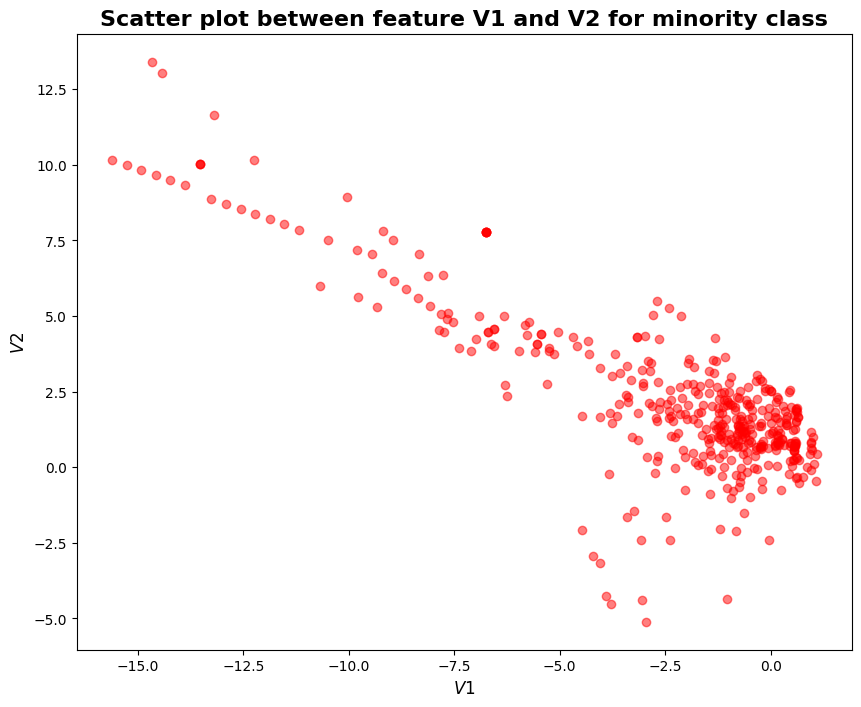

In [47]:
comp1, comp2 = 1, 2
col_names = list(df.columns)
plt.figure(figsize=(10, 8))
plt.scatter(X_minority[:, comp1], X_minority[:, comp2], c='red', alpha=0.5)
plt.title(f"Scatter plot between feature {col_names[comp1]} and {col_names[comp2]} for minority class", fontdict={"fontsize":16, "fontweight":"bold"})
plt.xlabel(f"${col_names[comp1]}$", fontsize=12)
plt.ylabel(f"${col_names[comp2]}$", fontsize=12)
plt.show()

C:\Users\TANMAY\AppData\Local\Temp\ipykernel_23324\1471037051.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(


<Figure size 1000x800 with 0 Axes>

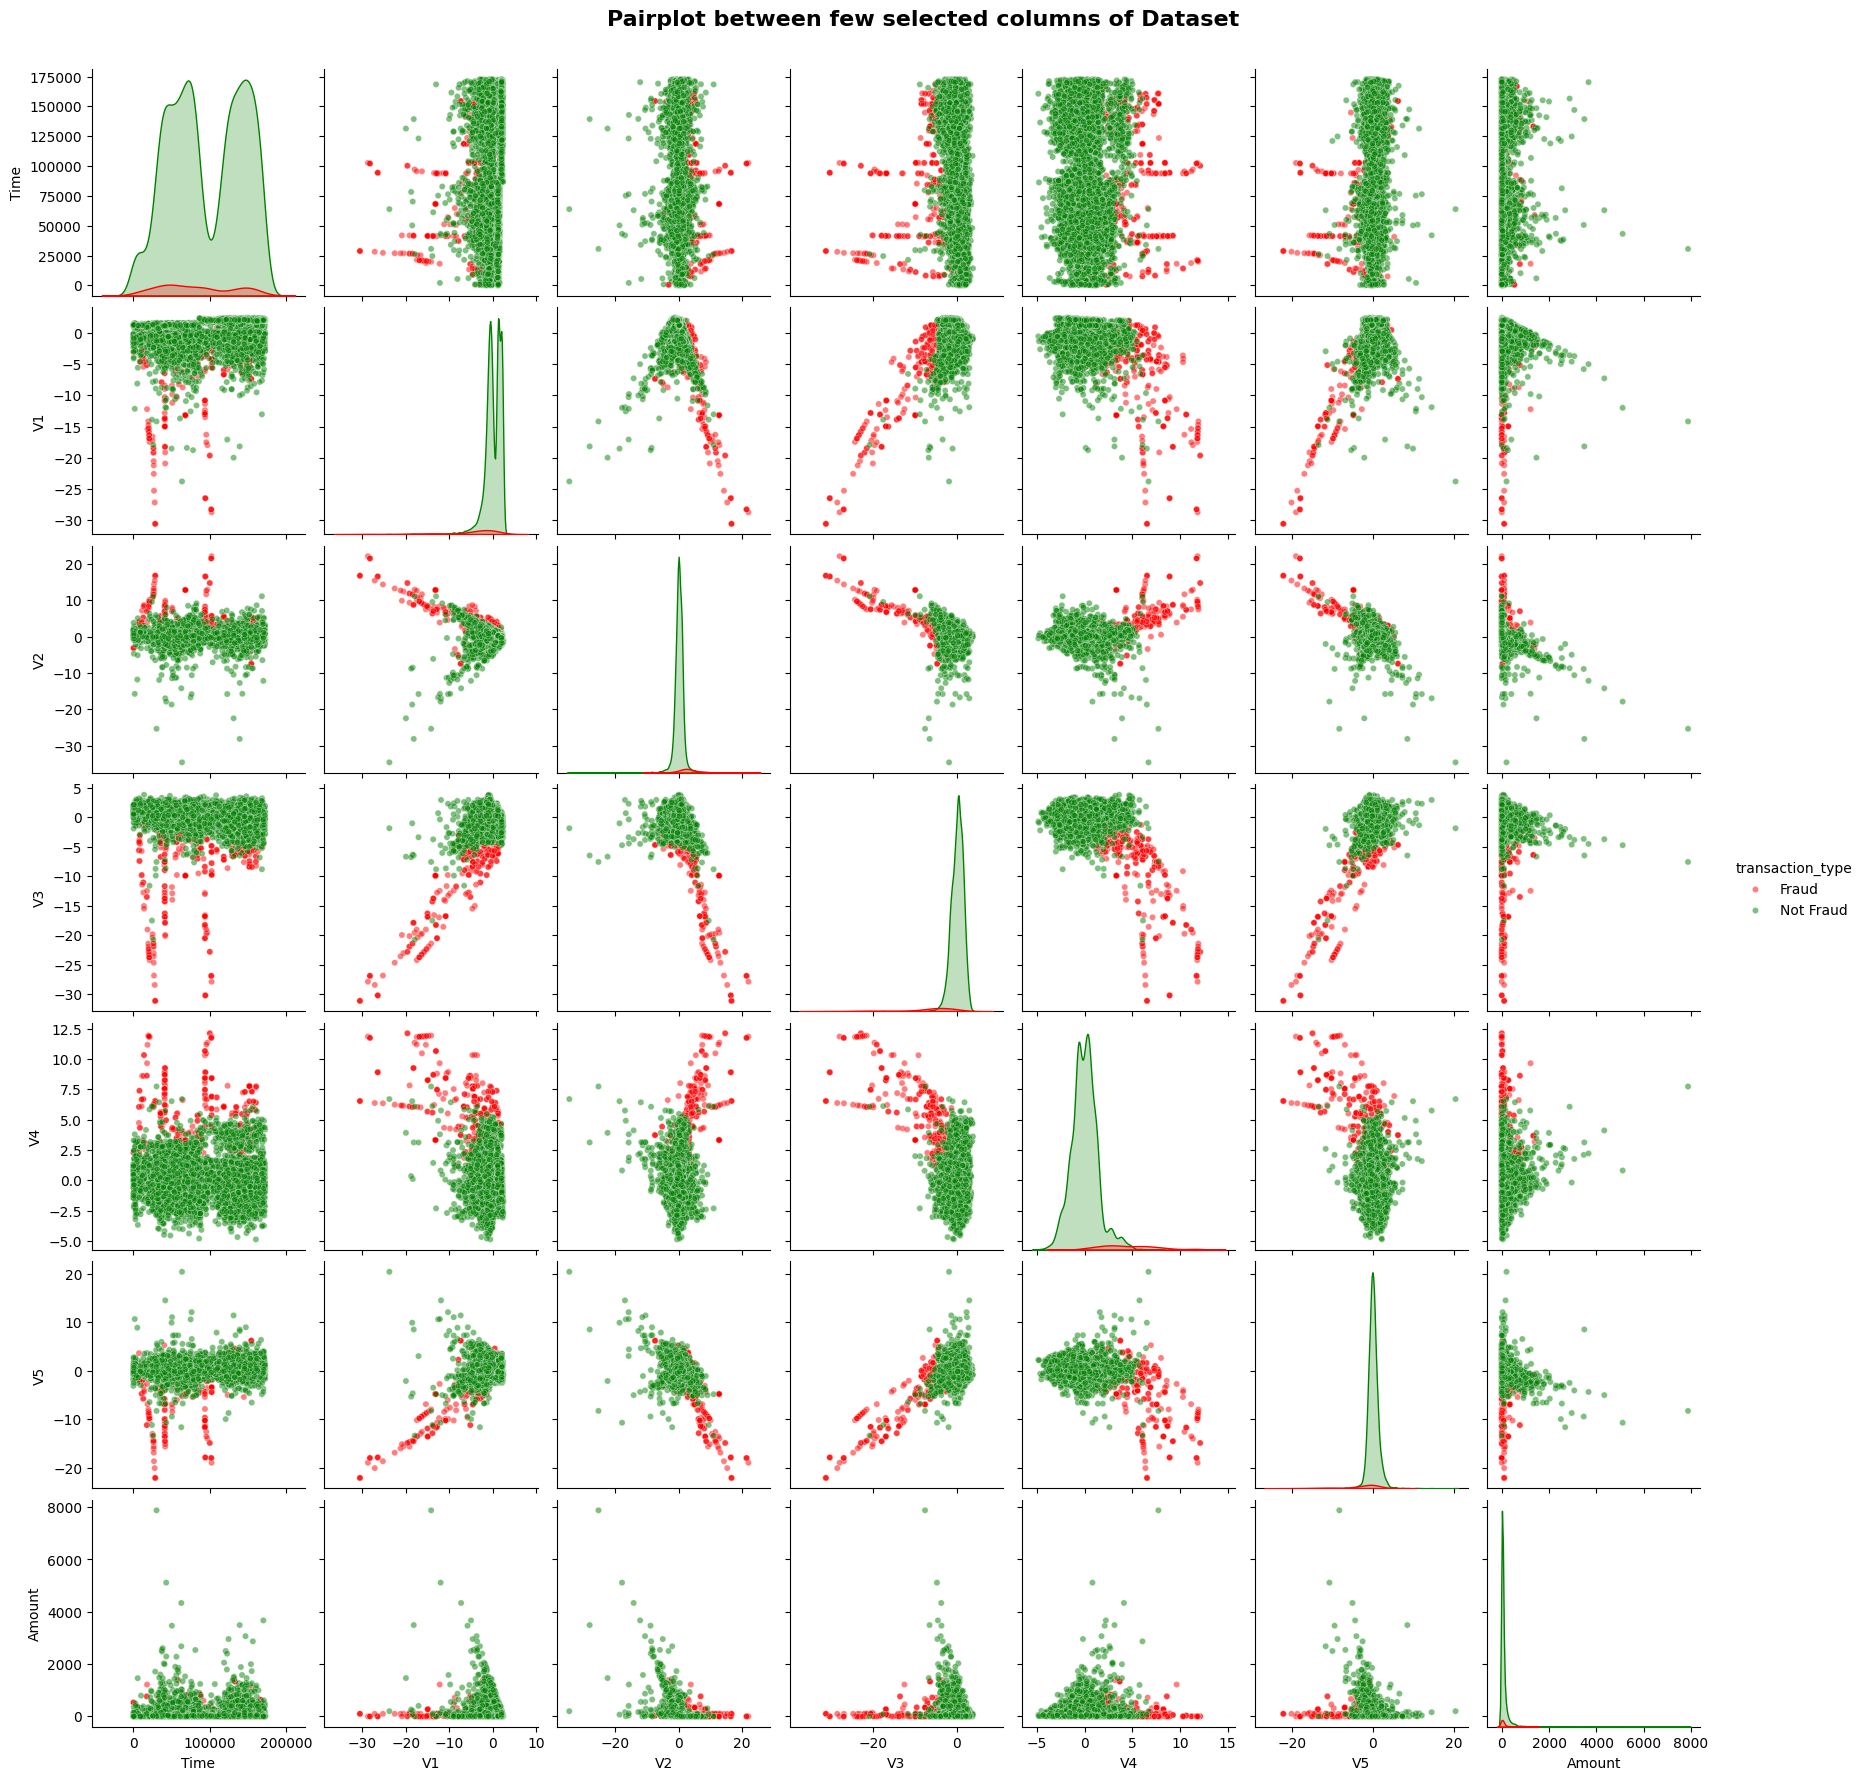

In [52]:
# Create pairplot
plt.figure(figsize=(10, 8))

df_sampled = ( # we need a sampled down dataset for running pairplot quickly
    df.groupby("transaction_type", group_keys=False)
      .apply(lambda x: x.sample(
          frac=0.03 if x.name == "Not Fraud" else 0.9,  # oversample Fraud
          replace=True, 
          random_state=42
      ))
)

sns.pairplot(
    df_sampled,
    vars=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount'],
    hue='transaction_type',
    palette={'Fraud': 'red', 'Not Fraud': 'green'},
    diag_kind='kde',   # KDE on the diagonal
    plot_kws={'alpha': 0.5, 's': 20}  # smaller, transparent points
)

plt.suptitle("Pairplot between few selected columns of Dataset", y=1.02, fontsize=16, fontweight='bold')
plt.show()

This seems like a "not-so-simple" dataset.  
Let us say we fit a GMM on minority class and then generate synthetic minority samples from it, it might happen that the generated point might end-up nearer to a majority sample.  
And due to this the model might get confused i.e. synthetic data essentially says, "These points that look exactly like normal transactions, are actually fraud."

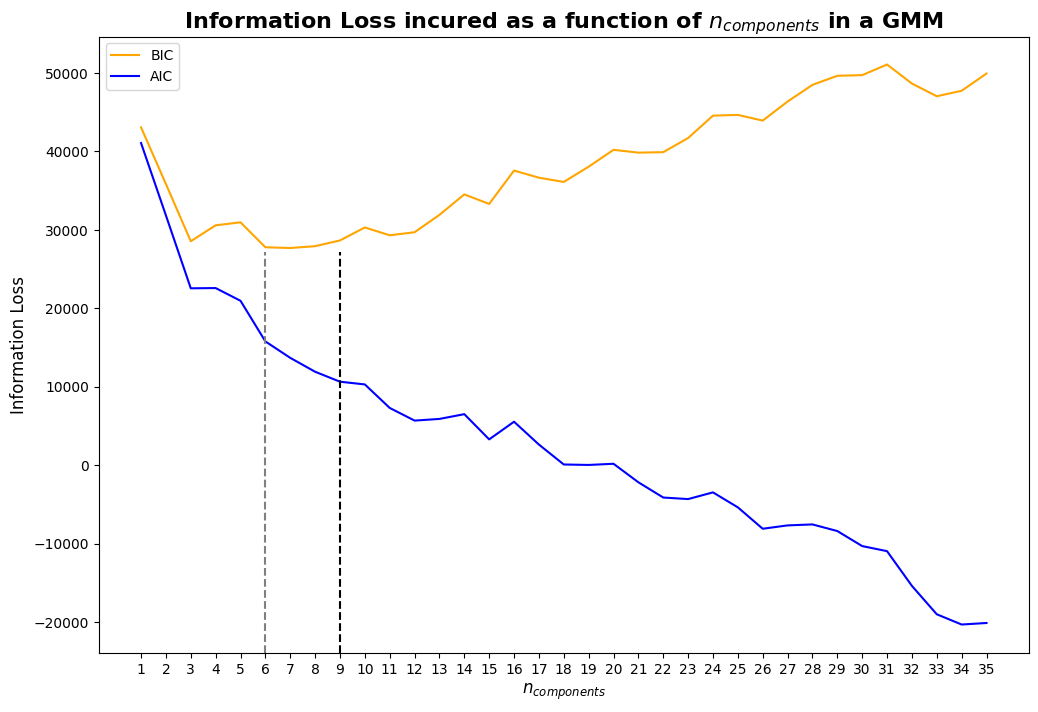

In [53]:
# let us try to find to optimal number of components for fitting our GMM
n_components = np.arange(1, 36)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_minority)
          for n in n_components]
plt.figure(figsize=(12, 8))
plt.plot(n_components, [m.bic(X_minority) for m in models], label='BIC', color='orange')
plt.plot(n_components, [m.aic(X_minority) for m in models], label='AIC', color='blue')
plt.legend(loc='best')
plt.xlabel('$n_{components}$', fontsize=12)
plt.ylabel('Information Loss', fontsize=12)
plt.axvline(x=6, linestyle='--', color='gray', ymax=0.65)
plt.axvline(x=9, linestyle='--', color='black', ymax=0.65)
plt.title('Information Loss incured as a function of $n_{components}$ in a GMM', fontsize=16, fontweight="bold")
plt.xticks(n_components)
plt.show()

While the **AIC** will keep dropping, we can balance the value of `n_components` weighing both **AIC** and **BIC**.  
This leads to `n_components = 9` as good choice, since increasing `n_components` from `6` to `9`, gave us drop in **AIC** but only marginal increase in **BIC**.  
Let us also try for `n_components = 6`.

In [54]:
gmm6 = GaussianMixture(n_components=6, max_iter=500, random_state=42)
gmm6.fit(X_minority)

,n_components,6
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [55]:
gmm9 = GaussianMixture(n_components=9, max_iter=500, random_state=42)
gmm9.fit(X_minority)

,n_components,9
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [56]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(0, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    ax.set_title("Clustered data points by Gaussian Mixture", fontsize=16, fontweight="bold")
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)

    w_factor = 0.5 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

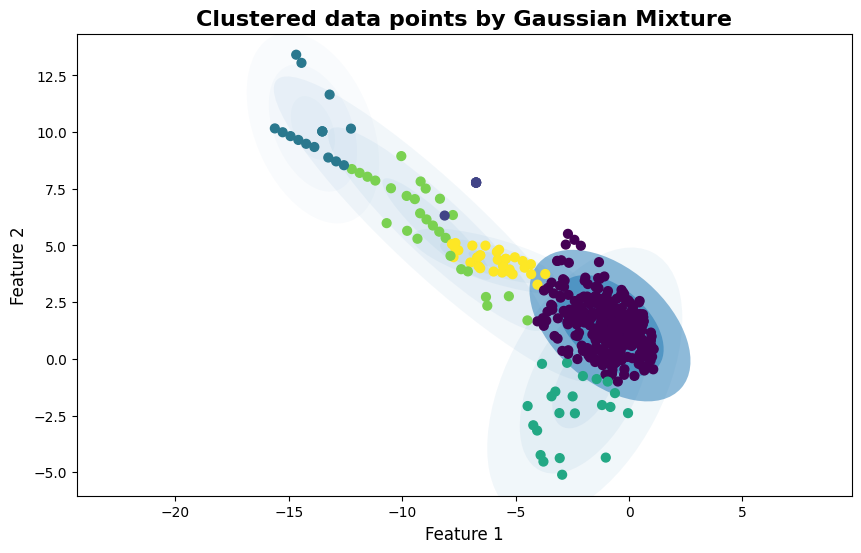

In [57]:
col_names = list(df.columns) # in above list, V1 to V28 is the data projected on top-28 PCs of the original dataset (whose access we do not have)
plt.figure(figsize=(10, 6))
plot_gmm(gmm6, X_minority[:, 1:3], label=True) # for n_components=6

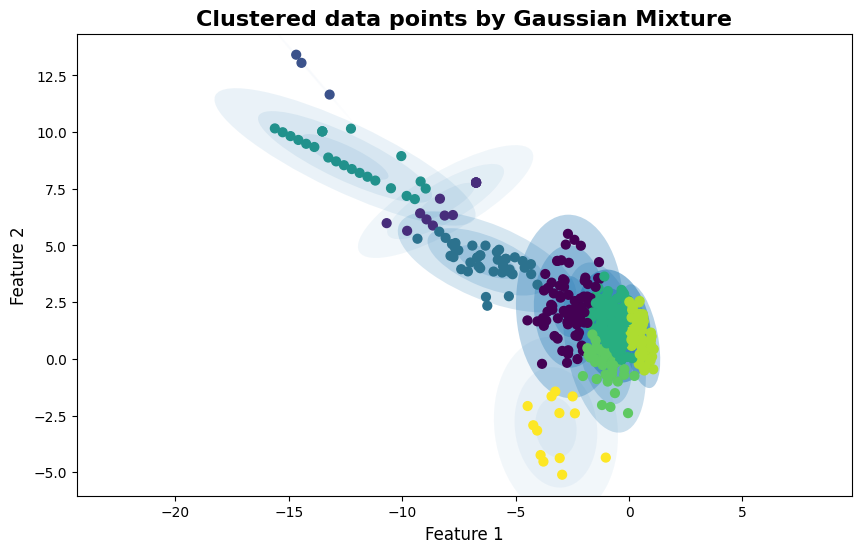

In [58]:
col_names = list(df.columns) # in above list, V1 to V28 is the data projected on top-28 PCs of the original dataset (whose access we do not have)
plt.figure(figsize=(10, 6))
plot_gmm(gmm9, X_minority[:, 1:3], label=True) # for n_components=9

#### Generating synthetic data

### Approach to create a balanced dataset using CBU-based downsampling for majority class, and GMM-based upsampling for minority class

We know that we have only `~400` minority samples, and then if we try to _sample_ a very large number number of minority samples from our **GMM** to match the count of majority class we are at a risk of _generating_ unrealistic or noisy minority samples.  
So we must down-sample our majority class to a quite small number, so that during upsampling from GMM we do not run to the mentioned risk.

Process:

1. Decide the downsample size for majority class. 
2. As `ClusterCentroids` has a parameter `sampling_strategy` which can be used to achieve this.
   $$ sampling\_\space strategy = N_{minority} / N_{majority \space \space after \space \space resampling} $$
    e.g.: $N_{minority} = 400$; $N_{majority} = 2,00,000$; if we want $5000$ majority samples (i.e. $N_{majority \space \space after \space \space resampling}$ is $5000$), we can define `sampling_strategy` as $400/5000$.
3. Now we can sample $N'$ samples from GMM to match the count of majority class; such that $N'$ = $N_{majority \space \space after \space \space resampling}$ - $N_{minority}$.

In [62]:
from sklearn.cluster import MiniBatchKMeans
def balance_dataset(X, y, gmm_model, n_majority_after_resampling = 200, minority_class = 1):
    print("Original dataset shape:", collections.Counter(y))
    n_minority = len(X_minority)
    sampling_strategy = n_minority / n_majority_after_resampling
    print("Running CBU, can take a while...")
    cbu = ClusterCentroids(sampling_strategy=sampling_strategy, estimator=MiniBatchKMeans(n_clusters=n_majority_after_resampling, batch_size=2048, random_state=16), random_state=16,)
    X_train_cbu, y_train_cbu = cbu.fit_resample(X, y)
    print("CBU Resampled dataset shape:", collections.Counter(y_train_cbu))
    n_dash = n_majority_after_resampling - n_minority
    print(f"Sampling remaining {n_dash} minority samples from GMM...")
    X_minority_sampled, _ = gmm_model.sample(n_dash)
    X_train_balanced, y_train_balanced = np.vstack((X_train_cbu, X_minority_sampled)), np.hstack((y_train_cbu, np.array([minority_class]*n_dash)))
    print("Balanced dataset shape:", collections.Counter(y_train_balanced.tolist()), "\n")
    return X_train_balanced, y_train_balanced


def get_best_sample_size(func, samples, X_train, y_train, X_test, y_test, gmm_fitted):
    metrics = {}
    for sample in samples:
        model = LogisticRegression()
        X_train_balanced, y_train_balanced = func(X_train, y_train, gmm_fitted, n_majority_after_resampling=sample)
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test)
        metric = evaluate_model(y_test, y_pred, model_name="Model-2", verbose=False)
        print('\n\n')
        metrics[sample] = metric
    return metrics

In [63]:
gmm9 = GaussianMixture(n_components=9, max_iter=500, random_state=42)
gmm9.fit(X_minority)

,n_components,9
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [64]:
samples = [2000, 4000, 5000, 5500, 6000, 6500, 7000, 8000, 9000, 10_000]
metrics9 = get_best_sample_size(balance_dataset, samples, X_train_scaled, y_train, X_test_scaled, y_test, gmm9)

Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 2000, 1: 418})
Sampling remaining 1582 minority samples from GMM...
Balanced dataset shape: Counter({0: 2000, 1: 2000}) 




Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 4000, 1: 418})
Sampling remaining 3582 minority samples from GMM...
Balanced dataset shape: Counter({0: 4000, 1: 4000}) 




Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5000, 1: 418})
Sampling remaining 4582 minority samples from GMM...
Balanced dataset shape: Counter({0: 5000, 1: 5000}) 




Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5500, 1: 418})
Sampling remaining 5082 minority samples from GMM...
Balanced dataset shape: Counter({0: 5500, 1: 5500

In [65]:
best_sample_size9 = None
best_precision9 = -1
for sample_size, metric in metrics9.items():
    curr_precision = metric["Precision"]
    if curr_precision > best_precision9:
        best_sample_size9 = sample_size
        best_precision9 = curr_precision
print(f"For n_components=9, Best precision: {round(best_precision9, 4)} for maj. sample size: {best_sample_size9}")

For n_components=9, Best precision: 0.0767 for maj. sample size: 8000


In [66]:
gmm6 = GaussianMixture(n_components=6, max_iter=500, random_state=42)
gmm6.fit(X_minority)

,n_components,6
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,500
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [67]:
%%time
samples = [5000, 5500, 6000, 6500, 7000, 8000, 9000, 10_000, 15_000, 20_000]
metrics6 = get_best_sample_size(balance_dataset, samples, X_train_scaled, y_train, X_test_scaled, y_test, gmm6)

Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5000, 1: 418})
Sampling remaining 4582 minority samples from GMM...
Balanced dataset shape: Counter({0: 5000, 1: 5000}) 




Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 5500, 1: 418})
Sampling remaining 5082 minority samples from GMM...
Balanced dataset shape: Counter({0: 5500, 1: 5500}) 




Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6000, 1: 418})
Sampling remaining 5582 minority samples from GMM...
Balanced dataset shape: Counter({0: 6000, 1: 6000}) 




Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 6500, 1: 418})
Sampling remaining 6082 minority samples from GMM...
Balanced dataset shape: Counter({0: 6500, 1: 6500

In [144]:
best_sample_size6 = None
best_precision6 = -1
for sample_size, metric in metrics6.items():
    curr_precision = metric["Precision"]
    if curr_precision > best_precision6:
        best_sample_size6 = sample_size
        best_precision6 = curr_precision
print(f"For n_components=6, Best precision: {round(best_precision6, 4)} for maj. sample size: {best_sample_size6}")

For n_components=6, Best precision: 0.0929 for maj. sample size: 15000


In [69]:
best_sample_size=15000

In [70]:
%%time
X_train_balanced, y_train_balanced = balance_dataset(X_train_scaled, y_train, gmm6, n_majority_after_resampling=best_sample_size)

Original dataset shape: Counter({0: 241667, 1: 418})
Running CBU, can take a while...
CBU Resampled dataset shape: Counter({0: 15000, 1: 418})
Sampling remaining 14582 minority samples from GMM...
Balanced dataset shape: Counter({0: 15000, 1: 15000}) 

CPU times: total: 11min 16s
Wall time: 2min 26s


# **C. Model Comparison and Analysis**

## 1. Train and Evaluate Models

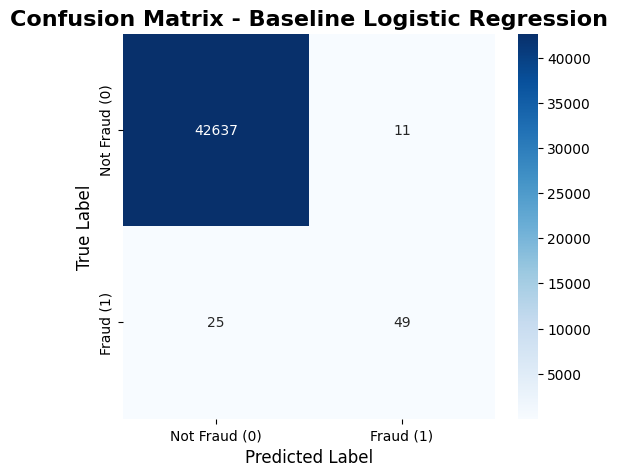

Baseline Logistic Regression performance metrics
Accuracy   = 0.999
Precision  = 0.817
Recall     = 0.662
F1 Score   = 0.731
Confusion matrix (x axis = predicted, y axis = true) = 
[[42637    11]
 [   25    49]]
Model Name (x axis = predicted, y axis = true) = 
Baseline Logistic Regression


In [145]:
model1_metrics = evaluate_model(y_test, y_pred1, model_name="Baseline Logistic Regression")

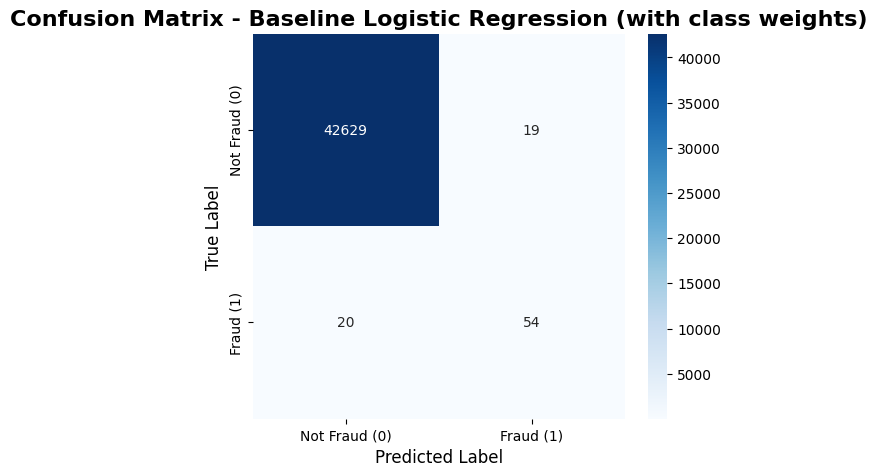

Baseline Logistic Regression (with class weights) performance metrics
Accuracy   = 0.999
Precision  = 0.740
Recall     = 0.730
F1 Score   = 0.735
Confusion matrix (x axis = predicted, y axis = true) = 
[[42629    19]
 [   20    54]]
Model Name (x axis = predicted, y axis = true) = 
Baseline Logistic Regression (with class weights)


In [147]:
class_weight = {0: 1, 1: 2}
params2 = {"penalty":'l2', "solver":'liblinear', "random_state":42, "class_weight":class_weight}
y_pred2 = model_preds(X_train_scaled, y_train, X_test_scaled, y_test, LogisticRegression, params2)
model2_metrics = evaluate_model(y_test, y_pred2, model_name="Baseline Logistic Regression (with class weights)")

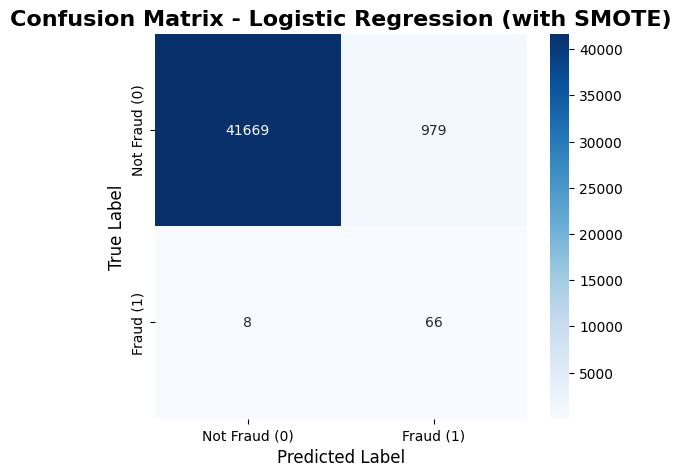

Logistic Regression (with SMOTE) performance metrics
Accuracy   = 0.977
Precision  = 0.063
Recall     = 0.892
F1 Score   = 0.118
Confusion matrix (x axis = predicted, y axis = true) = 
[[41669   979]
 [    8    66]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with SMOTE)


In [148]:
params3 = {"penalty":'l2', "solver":'lbfgs', "random_state":42}
y_pred3 = model_preds(X_train_smote, y_train_smote, X_test_scaled, y_test, LogisticRegression, params3)
model3_metrics = evaluate_model(y_test, y_pred3, model_name="Logistic Regression (with SMOTE)")

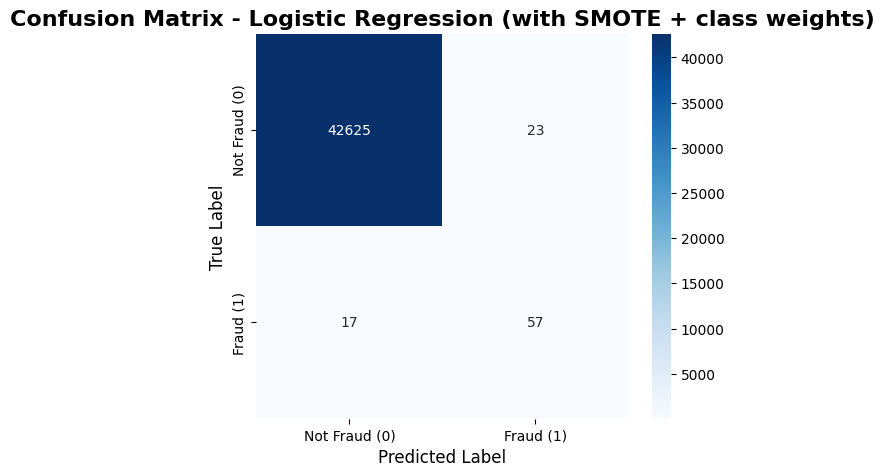

Logistic Regression (with SMOTE + class weights) performance metrics
Accuracy   = 0.999
Precision  = 0.713
Recall     = 0.770
F1 Score   = 0.740
Confusion matrix (x axis = predicted, y axis = true) = 
[[42625    23]
 [   17    57]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with SMOTE + class weights)


In [149]:
params4 = {"penalty":'l1', "solver":'liblinear', "random_state":42, "class_weight":{0:1, 1:0.005}}
y_pred4 = model_preds(X_train_smote, y_train_smote, X_test_scaled, y_test, LogisticRegression, params4)
model4_metrics = evaluate_model(y_test, y_pred4, model_name="Logistic Regression (with SMOTE + class weights)")

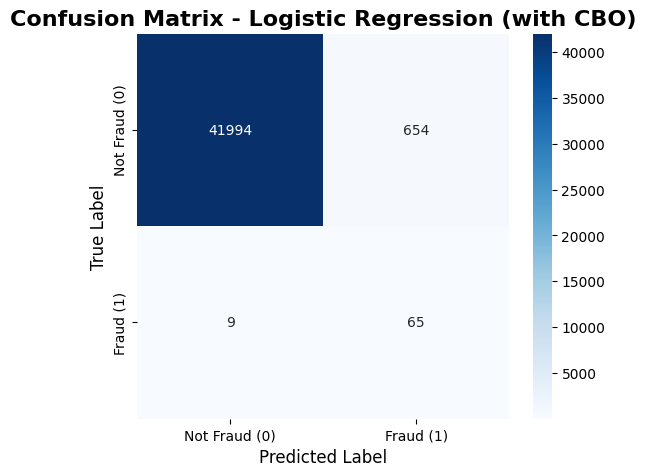

Logistic Regression (with CBO) performance metrics
Accuracy   = 0.984
Precision  = 0.090
Recall     = 0.878
F1 Score   = 0.164
Confusion matrix (x axis = predicted, y axis = true) = 
[[41994   654]
 [    9    65]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with CBO)


In [151]:
params5 = {"penalty":'l2', "solver":'lbfgs', "random_state":42}
y_pred5 = model_preds(X_train_cbo, y_train_cbo, X_test_scaled, y_test, LogisticRegression, params5)
model5_metrics = evaluate_model(y_test, y_pred5, model_name="Logistic Regression (with CBO)")

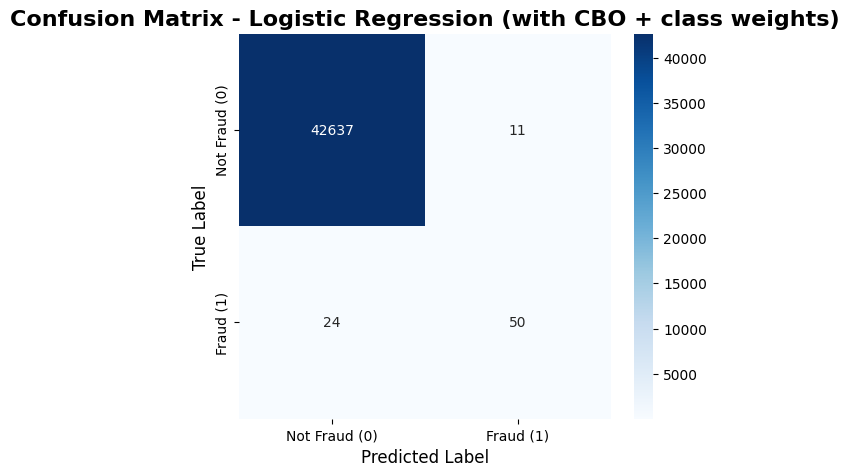

Logistic Regression (with CBO + class weights) performance metrics
Accuracy   = 0.999
Precision  = 0.820
Recall     = 0.676
F1 Score   = 0.741
Confusion matrix (x axis = predicted, y axis = true) = 
[[42637    11]
 [   24    50]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with CBO + class weights)


In [152]:
params6 = {"penalty":'l2', "solver":'liblinear', "random_state":42, "class_weight":{0:1, 1:0.003}}
y_pred6 = model_preds(X_train_cbo, y_train_cbo, X_test_scaled, y_test, LogisticRegression, params6)
model6_metrics = evaluate_model(y_test, y_pred6, model_name="Logistic Regression (with CBO + class weights)")

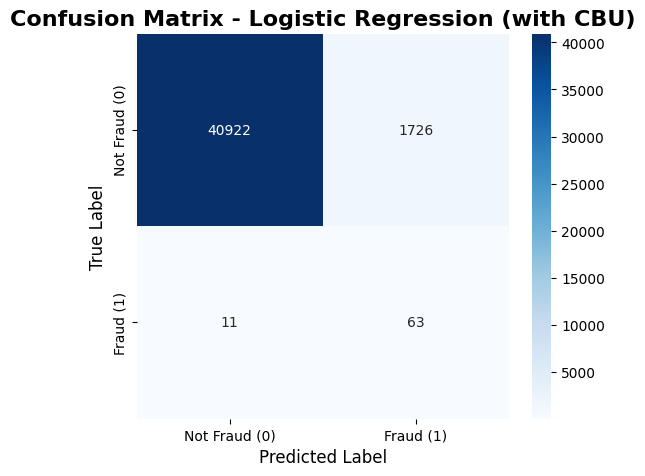

Logistic Regression (with CBU) performance metrics
Accuracy   = 0.959
Precision  = 0.035
Recall     = 0.851
F1 Score   = 0.068
Confusion matrix (x axis = predicted, y axis = true) = 
[[40922  1726]
 [   11    63]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with CBU)


In [153]:
params7 = {"penalty":'l2', "solver":'lbfgs', "random_state":42}
y_pred7 = model_preds(X_train_cbu, y_train_cbu, X_test_scaled, y_test, LogisticRegression, params7)
model7_metrics = evaluate_model(y_test, y_pred7, model_name="Logistic Regression (with CBU)")

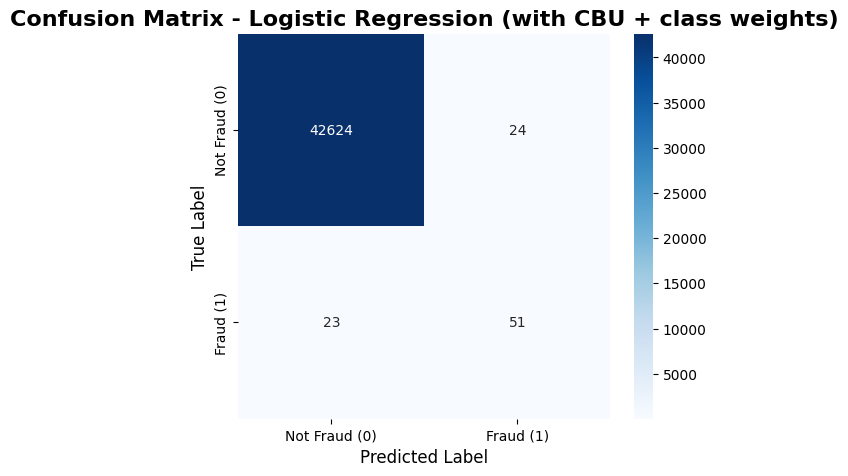

Logistic Regression (with CBU + class weights) performance metrics
Accuracy   = 0.999
Precision  = 0.680
Recall     = 0.689
F1 Score   = 0.685
Confusion matrix (x axis = predicted, y axis = true) = 
[[42624    24]
 [   23    51]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with CBU + class weights)


In [155]:
params8 = {"penalty":'l2', "solver":'liblinear', "random_state":42, "class_weight":{0:1, 1:0.05}}
y_pred8 = model_preds(X_train_cbu, y_train_cbu, X_test_scaled, y_test, LogisticRegression, params8)
model8_metrics = evaluate_model(y_test, y_pred8, model_name="Logistic Regression (with CBU + class weights)")

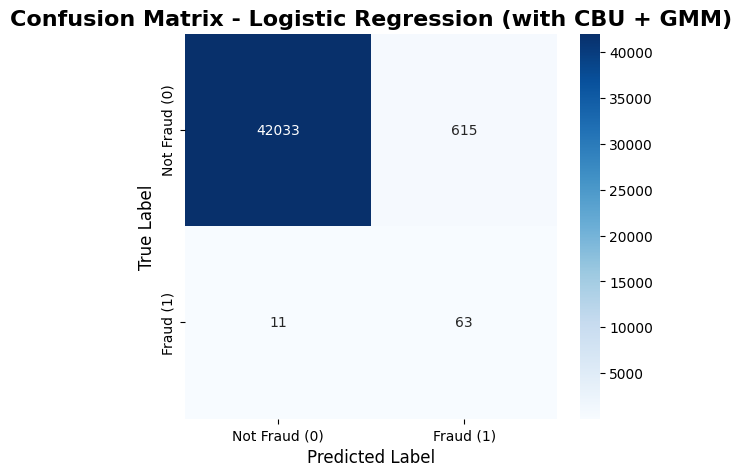

Logistic Regression (with CBU + GMM) performance metrics
Accuracy   = 0.985
Precision  = 0.093
Recall     = 0.851
F1 Score   = 0.168
Confusion matrix (x axis = predicted, y axis = true) = 
[[42033   615]
 [   11    63]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with CBU + GMM)


In [156]:
params9 = {"penalty":'l2', "solver":'lbfgs', "random_state":42}
y_pred9 = model_preds(X_train_balanced, y_train_balanced, X_test_scaled, y_test, LogisticRegression, params9)
model9_metrics = evaluate_model(y_test, y_pred9, model_name="Logistic Regression (with CBU + GMM)")

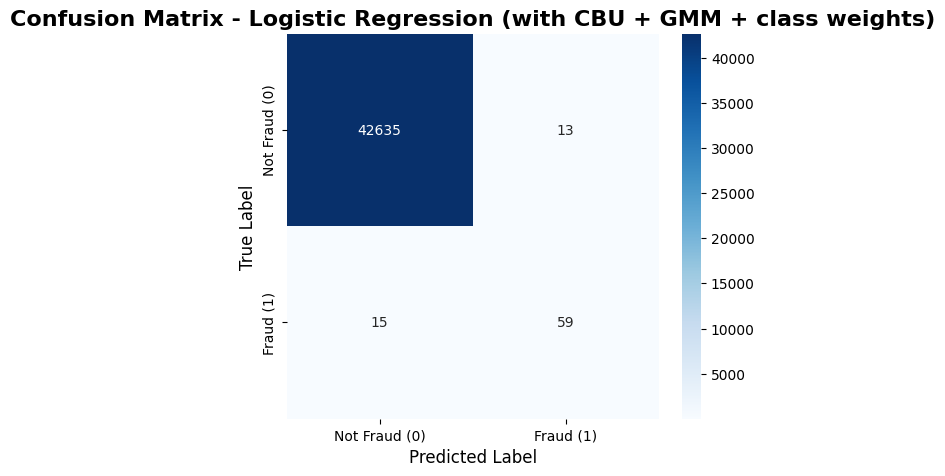

Logistic Regression (with CBU + GMM + class weights) performance metrics
Accuracy   = 0.999
Precision  = 0.819
Recall     = 0.797
F1 Score   = 0.808
Confusion matrix (x axis = predicted, y axis = true) = 
[[42635    13]
 [   15    59]]
Model Name (x axis = predicted, y axis = true) = 
Logistic Regression (with CBU + GMM + class weights)


In [160]:
params10 = {"penalty":'l1', "solver":'liblinear', "random_state":42, "class_weight":{0:1, 1:0.005}}
y_pred10 = model_preds(X_train_balanced, y_train_balanced, X_test_scaled, y_test, LogisticRegression, params10)
model10_metrics = evaluate_model(y_test, y_pred10, model_name="Logistic Regression (with CBU + GMM + class weights)")

In [161]:
from sklearn.ensemble import RandomForestClassifier

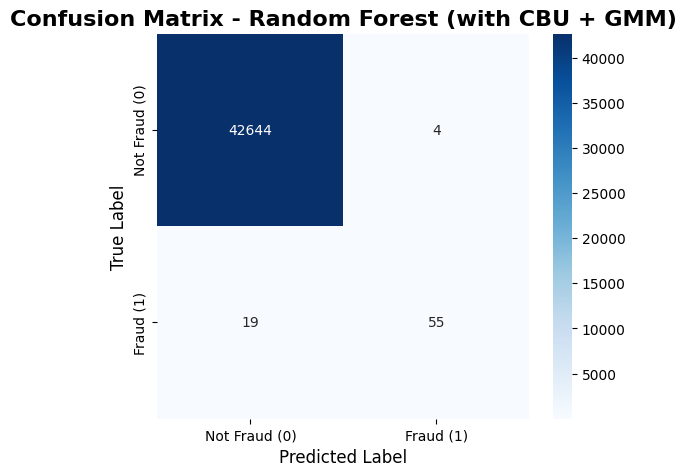

Random Forest (with CBU + GMM) performance metrics
Accuracy   = 0.999
Precision  = 0.932
Recall     = 0.743
F1 Score   = 0.827
Confusion matrix (x axis = predicted, y axis = true) = 
[[42644     4]
 [   19    55]]
Model Name (x axis = predicted, y axis = true) = 
Random Forest (with CBU + GMM)
CPU times: total: 9min 53s
Wall time: 2min 29s


In [171]:
%%time
params11 = {"random_state":42, "class_weight":"balanced", "n_estimators":350, "n_jobs":4}
y_pred11 = model_preds(X_train_scaled, y_train, X_test_scaled, y_test, RandomForestClassifier, params11)
model11_metrics = evaluate_model(y_test, y_pred11, model_name="Random Forest (with CBU + GMM)")

## 2. Performance Comparison

In [174]:
metrics_all = [model1_metrics, model2_metrics, model3_metrics, model4_metrics, model5_metrics, model6_metrics,
               model7_metrics, model8_metrics, model9_metrics, model10_metrics, model11_metrics]

In [175]:
metrics_df = pd.DataFrame(metrics_all)
metrics_df.set_index('Model Name', inplace=True)

In [177]:
metrics_df

,Accuracy,Precision,Recall,F1 Score,Confusion matrix
Model Name,,,,,
Baseline Logistic Regression,0.999157,0.816667,0.662162,0.731343,"[[42637, 11], [25, 49]]"
Baseline Logistic Regression (with class weights),0.999087,0.739726,0.729730,0.734694,"[[42629, 19], [20, 54]]"
Logistic Regression (with SMOTE),0.976897,0.063158,0.891892,0.117962,"[[41669, 979], [8, 66]]"
Logistic Regression (with SMOTE + class weights),0.999064,0.712500,0.770270,0.740260,"[[42625, 23], [17, 57]]"
Logistic Regression (with CBO),0.984481,0.090403,0.878378,0.163934,"[[41994, 654], [9, 65]]"
Logistic Regression (with CBO + class weights),0.999181,0.819672,0.675676,0.740741,"[[42637, 11], [24, 50]]"
Logistic Regression (with CBU),0.959342,0.035215,0.851351,0.067633,"[[40922, 1726], [11, 63]]"
Logistic Regression (with CBU + class weights),0.998900,0.680000,0.689189,0.684564,"[[42624, 24], [23, 51]]"
Logistic Regression (with CBU + GMM),0.985347,0.092920,0.851351,0.167553,"[[42033, 615], [11, 63]]"


In [178]:
metrics_df_sub = metrics_df.drop(columns=["Accuracy", "Confusion matrix"])

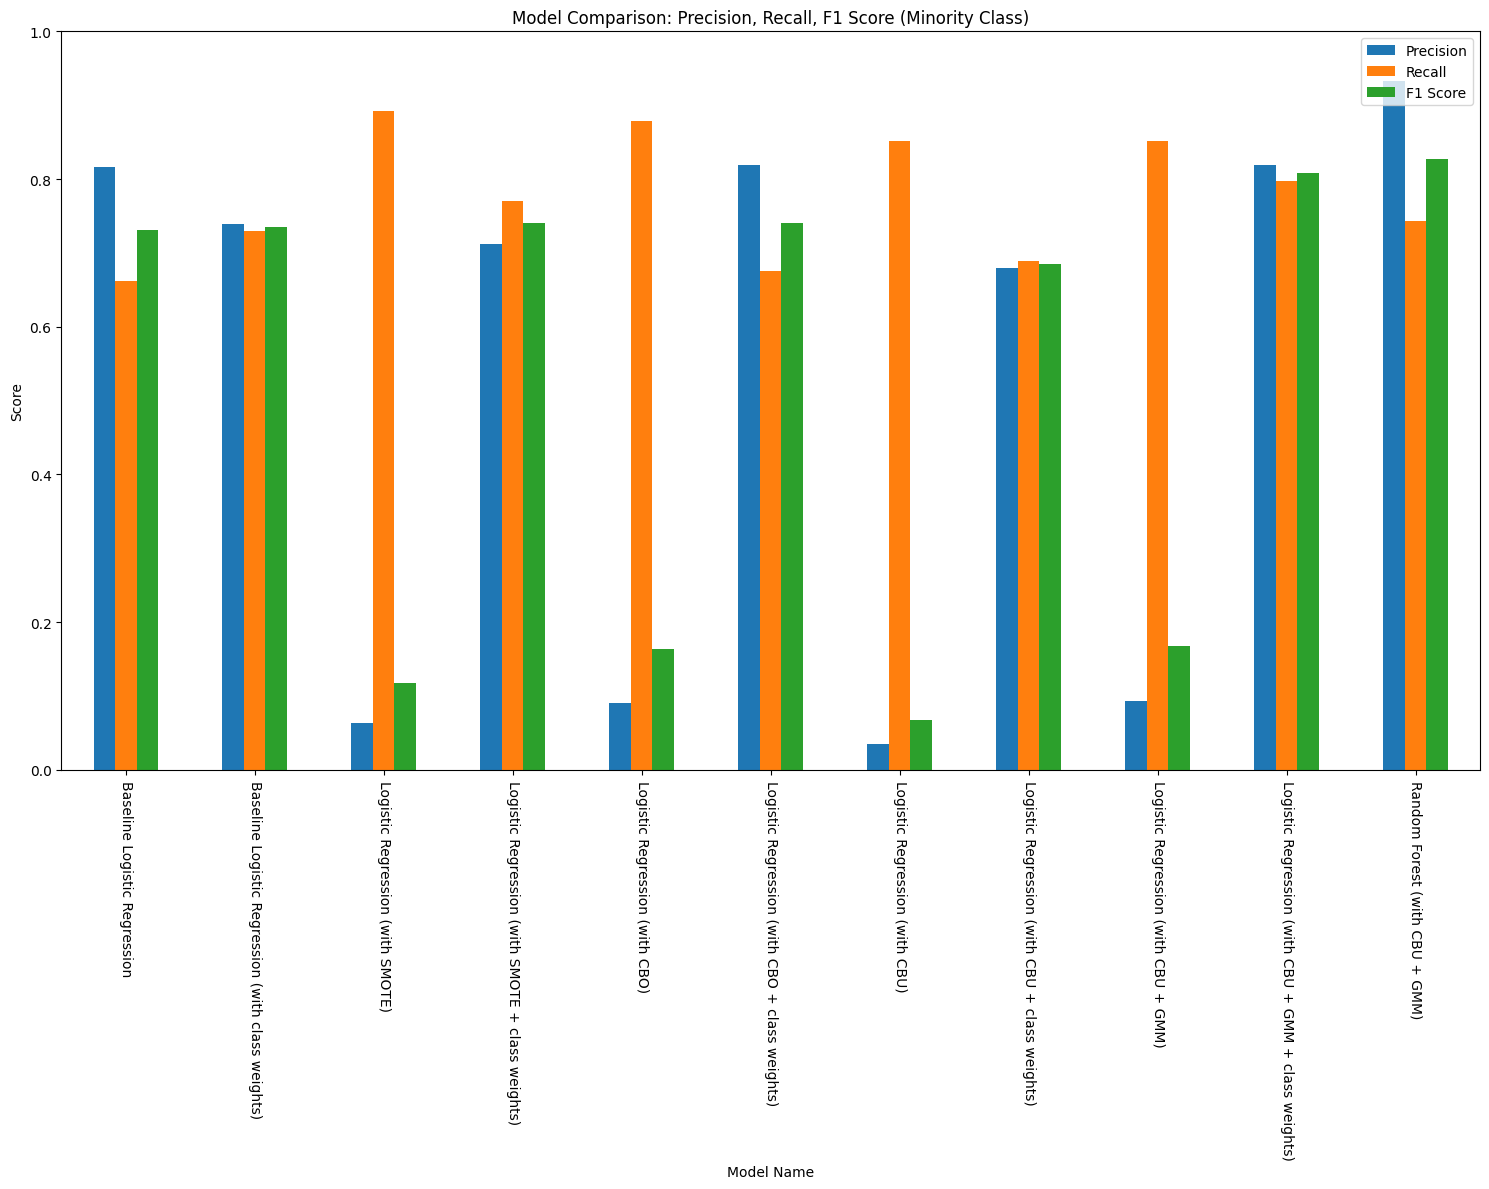

In [186]:
metrics_df_sub.plot(kind='bar', figsize=(15, 12))
plt.title('Model Comparison: Precision, Recall, F1 Score (Minority Class)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=-90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

## 3. Conclusion and Recommendations

Among all the approaches, the results show a **clear trade-off between recall (catching fraud) and precision (avoiding false alarms)**. However, unlike the earlier comparison, the **Logistic Regression (with class weights)**, **Logistic Regression (CBU+GMM+class weights)**, and **Random Forest (CBU+GMM)** models stand out, achieving **balanced performance across precision, recall, and F1-score**, significantly outperforming plain resampling strategies.

---

## Benefits and Drawbacks of Each Method

1. **Baseline (Imbalanced Logistic Regression):**

   * **Benefits:** Very strong precision (0.817) and a solid F1-score (0.731). Fewer false positives, reliable overall.
   * **Drawbacks:** Recall (0.662) leaves many fraud cases undetected.

2. **Logistic Regression (with class weights):**

   * **Benefits:** Improves recall to 0.730 while maintaining solid precision (0.740). F1-score slightly better than baseline (0.735). Detects more fraud cases without massive precision loss.
   * **Drawbacks:** Slight decrease in overall accuracy. Still not as balanced as CBU+GMM variants.

3. **SMOTE Oversampling:**

   * **Benefits:** Recall surges to 0.892.
   * **Drawbacks:** Precision collapses to 0.063 (94% false alarms). F1 (0.118) is practically unusable.

4. **Logistic Regression (with SMOTE + class weights):**

   * **Benefits:** Recall remains high (0.770) and F1 improves (0.740) due to class weighting.
   * **Drawbacks:** Precision still low (0.713), many false positives remain.

5. **Clustering-Based Oversampling (CBO):**

   * **Benefits:** Recall remains high (0.878), slightly better than SMOTE.
   * **Drawbacks:** Precision low (0.090), F1 (0.164) remains poor, not competitive with baseline.

6. **Logistic Regression (with CBO + class weights):**

   * **Benefits:** Precision improves significantly (0.820), F1 rises to 0.741. Class weights help balance recall (0.676) and precision.
   * **Drawbacks:** Recall still moderate compared to SMOTE; computational overhead higher.

7. **Clustering-Based Undersampling (CBU):**

   * **Benefits:** Recall stays strong (0.851).
   * **Drawbacks:** Precision drops to 0.035 and F1 (0.068) is the worst among all methods.

8. **Logistic Regression (CBU + class weights):**

   * **Benefits:** Better balance with Precision 0.680, Recall 0.689, F1 0.685. Class weights prevent precision from collapsing.
   * **Drawbacks:** Still lower overall F1 than CBU+GMM variants.

9. **Logistic Regression (CBU + GMM):**

   * **Benefits:** Recall remains strong (0.851).
   * **Drawbacks:** Precision very low (0.093), F1 (0.168) not competitive.

10. **Logistic Regression (CBU + GMM + class weights):**

    * **Benefits:** Achieves the **best F1 among LR variants (0.808)** with strong balance (Precision 0.819, Recall 0.797).
    * **Drawbacks:** Computationally heavier (resampling + weighting).

11. **Random Forest (CBU + GMM):**

    * **Benefits:** Strong performance across all metrics (Precision 0.932, Recall 0.743, F1 0.827). Excels at minimizing false alarms while catching most fraud cases.
    * **Drawbacks:** Slightly lower recall than LR (CBU+GMM+cw), but overall better balance.

## Performance Summary

| Model                                                | Precision | Recall | F1 Score |
| ---------------------------------------------------- | --------- | ------ | -------- |
| Baseline Logistic Regression                         | **0.817**     | 0.662  | 0.731    |
| Baseline Logistic Regression (with class weights)    | 0.740     | 0.730  | 0.735    |
| Logistic Regression (with SMOTE)                     | 0.063     | **0.892**  | 0.118    |
| Logistic Regression (with SMOTE + class weights)     | 0.713     | 0.770  | 0.740    |
| Logistic Regression (with CBO)                       | 0.090     | 0.878  | 0.164    |
| Logistic Regression (with CBO + class weights)       | 0.820     | 0.676  | **0.741**    |
| Logistic Regression (with CBU)                       | 0.035     | 0.851  | 0.068    |
| Logistic Regression (with CBU + class weights)       | 0.680     | 0.689  | 0.685    |
| Logistic Regression (with CBU + GMM)                 | 0.093     | 0.851  | 0.168    |
| Logistic Regression (with CBU + GMM + class weights) | **0.819**     | **0.797**  | **0.808**   |
| Random Forest (with CBU + GMM)                       | **0.932**     | **0.743**  | **0.827**    |

---

## Which Method Performed Best and Why

* **Random Forest (CBU+GMM)** gave the **best F1-score (0.83)**, combining high precision and strong recall.
* **Logistic Regression (CBU+GMM + class weights)** was very close behind (F1 = 0.81), slightly better recall but lower precision.
* **Logistic Regression with class weights** provides a simpler, interpretable model that still improves recall over the baseline without resampling.
* All three clearly outperform the baseline Logistic Regression and simple resampling methods.

---

## Recommendation

* For this dataset, the **Random Forest (CBU+GMM)** model is recommended as the primary choice. It provides the best trade-off, catching a large fraction of fraud cases while minimizing false alarms.
* If interpretability is critical, then **Logistic Regression (CBU+GMM + class weights)** is a strong alternative.
* For a simpler, low-complexity solution, **Logistic Regression with class weights** can still provide noticeable improvement over the baseline.
* Plain resampling approaches (SMOTE, CBO, CBU alone) should be avoided since they collapse precision and yield unusable models.
* Threshold tuning (adjusting the decision cutoff from 0.5) should be explored to further balance precision vs. recall depending on the business priority (cost of false negatives vs. false positives).



Thank you!